In [2]:
import pandas as pd 
import bs4 
import urllib
# Define URL
# “I Have A Dream” — Speech by Martin Luther King, Jr.
url = "https://www.marshall.edu/onemarshallu/i-have-a-dream/"
raw_html = urllib.request.urlopen(url) 
parsed_html = bs4.BeautifulSoup(raw_html, "lxml")
text = parsed_html.find_all("div", class_ = "entry-content") 
# Speech stored in list 
textl = []
for i in text: 
    textl.append(i.get_text()) 
# Convert to string 
cleantextprep = str(textl)

In [3]:
import re
# Clean Speech Text 
expression = "[^a-zA-Z0-9 ]" # keep only letters, numbers and whitespace
cleantextCAP = re.sub(expression, "", cleantextprep) # replace empty string 
cleantext = cleantextCAP.lower()
# Create Dictionary 
dat = list(cleantext.split()) 
dict1 = {} 
for i in range(len(dat)): 
    #print(i) 
    word = dat[i] 
    dict1[word] = dat.count(word)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Unsorted speech constituents in dictionary as dict1 
keys = list(dict1) 
filtered_words = [word for word in keys if word not in stopwords.words('english')] 
dict2 = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
dict2

{'ni': 1,
 'dream': 12,
 'speech': 2,
 'dr': 1,
 'martin': 1,
 'luther': 1,
 'king': 1,
 'jrnmarch': 1,
 'washington': 1,
 'jobs': 1,
 'freedomnaugust': 1,
 '28': 1,
 '1963nxa0nnspeech': 1,
 'transcriptni': 1,
 'happy': 1,
 'join': 3,
 'today': 9,
 'go': 11,
 'history': 2,
 'greatest': 1,
 'demonstration': 1,
 'freedom': 20,
 'nation': 10,
 'applausenfive': 1,
 'score': 1,
 'years': 5,
 'ago': 1,
 'great': 5,
 'american': 4,
 'whose': 1,
 'symbolic': 1,
 'shadow': 1,
 'stand': 3,
 'signed': 1,
 'emancipation': 1,
 'proclamation': 1,
 'momentous': 1,
 'decree': 1,
 'came': 2,
 'beacon': 1,
 'light': 1,
 'hope': 4,
 'millions': 1,
 'negro': 13,
 'slaves': 2,
 'audience': 1,
 'yeah': 19,
 'seared': 1,
 'flames': 1,
 'withering': 1,
 'injustice': 3,
 'joyous': 1,
 'daybreak': 1,
 'end': 2,
 'long': 6,
 'night': 1,
 'captivity': 1,
 'hmmnbut': 1,
 'one': 13,
 'hundred': 4,
 'later': 4,
 'right': 7,
 'still': 4,
 'free': 5,
 'lord': 22,
 'life': 2,
 'sadly': 1,
 'crippled': 1,
 'manacles': 1

In [24]:
# Finding word sequences in a dictionary ordered by frequency 
def SequenceSelection(dictionary, length, startindex = 0):
 
 # Check Input 
    if length > len(dictionary): 
        return print("input length is too long"); 
    else: 
        d = dictionary 
        items = [(v, k) for k, v in d.items()] 
        items.sort() 
        items.reverse() 
        itemsOut = [(k, v) for v, k in items] 

        highest = itemsOut[startindex:startindex + length] 
        dd = dict(highest) 
        wanted_keys = dd.keys() 
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d) 
        return dictshow 
 
dictshow = SequenceSelection(dictionary = dict2, length = 7, startindex = 0)

In [25]:
dictshow

{'yes': 51,
 'lord': 22,
 'freedom': 20,
 'yeah': 19,
 'applause': 19,
 'let': 16,
 'ring': 14}

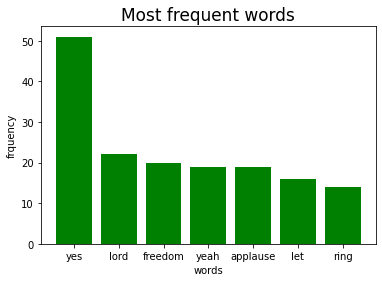

In [30]:
import matplotlib.pyplot as plt
dictionary = dictshow
plt.bar((dictionary.keys()), dictionary.values(), color='g')
plt.ylabel("frquency")          
plt.xlabel("words")           
plt.title("Most frequent words", {'fontsize' : 17})
plt.savefig("Most frequent words.png")
plt.show()

In [37]:
import pysentiment as ps 
# “I Have A Dream” — Speech by Martin Luther King, Jr.as cleantext 
hiv4 = ps.HIV4() # Use Harvard IV
tokens = hiv4.tokenize(cleantext) # split string into constituents
score = hiv4.get_score(tokens) 
print(score)



C:\Users\ASUS\Anaconda 2022\lib\site-packages\pysentiment\hiv4.py:16: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(self.PATH)


{'Positive': 167, 'Negative': 85, 'Polarity': 0.32539682410556814, 'Subjectivity': 0.3829787228222208}


In [53]:
score

{'Positive': 167,
 'Negative': 85,
 'Polarity': 0.32539682410556814,
 'Subjectivity': 0.3829787228222208}

In [1]:
import pandas as pd

d = [ ["Positive", 167],
     ["Negative", 85],
     ["Polarity", 0.32539682410556814],
    ["Subjectivity",  0.3829787228222208] ]

df = pd.DataFrame(d, columns = ['attribute ','score'])
print(df)

     attribute        score
0      Positive  167.000000
1      Negative   85.000000
2      Polarity    0.325397
3  Subjectivity    0.382979
